In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import random

Reference: https://github.com/alchemistry/alchemical-best-practices/blob/master/paper/figures/fig13_analysis_practices/gen_plots.py

In [13]:
def bootstrap(x_data: np.ndarray, y_data: np.ndarray, n_bootstrap_samples=1000):
    """
    compute pearson's r and mean from bootstrapped data to get confidence interval
    """
    sample_size = len(x_data)
    bootstrapped_samples = {"r": [],
                            "exp": [],
                            "afe": []}
    for i in range(n_bootstrap_samples):
        if i == 0:
            x_samples = x_data
            y_samples = y_data
        else:
            samples = np.random.choice(np.arange(sample_size), replace=True, size=n_bootstrap_samples)
            x_samples = [x_data[i] for i in samples]
            y_samples = [y_data[i] for i in samples]
        pearson_r = scipy.stats.pearsonr(x_samples, y_samples)
        bootstrapped_samples["r"].append(pearson_r)
        # mean_x = np.mean(x_samples)
        # mean_y = np.mean(y_samples)
        bootstrapped_samples["exp"].append(np.asarray(x_samples))
        bootstrapped_samples["afe"].append(np.asarray(y_samples))
    # bootstrap_df_tr = pd.DataFrame.from_dict(bootstrapped_samples, orient="index")
    # bootstrap_df = bootstrap_df_tr.transpose()
    # melted_df  = bootstrap_df.melt()
    # stats_df = melted_df.groupby("variable", as_index=False).agg(mean=("value", np.mean), 
    #                                                              lower_bound=("value", lambda x: np.quantile(x, q=0.05)), 
    #                                                              upper_bound=("value", lambda x: np.quantile(x, q=0.95)))
    # results = {"r": {},
    #            "avg_exp": {},
    #            "avg_afe": {}}
    # lower_limit = 0.05/2.0
    # upper_limit = 1.0 - lower_limit
    # results["r"]["real_value"] = bootstrapped_samples["r"][0]
    # for key in bootstrapped_samples.keys():
    #     ordered = bootstrapped_samples[key].sort()
    #     results[key]["lower_limit"] = bootstrapped_samples[key][int(lower_limit*n_bootstrap_samples)]
    #     results[key]["upper_limit"] = bootstrapped_samples[key][int(upper_limit*n_bootstrap_samples)]
    return stats_df

In [15]:
ddg_data = pd.read_csv("../outputs/free_energy/ddg_data.csv")
ddg_exp = ddg_data["ddg_exp"].to_numpy()
ddg_afe = ddg_data["ddg_afe"].to_numpy()
exp_err = ddg_data["ddg_exp_err"].to_numpy()
afe_err = ddg_data["ddg_afe_err"].to_numpy()

# bootstrap_result = bootstrap(ddg_exp, ddg_afe)
# exp_lower_limit = bootstrap_result["avg_exp"]["lower_limit"]
# exp_upper_limit = bootstrap_result["avg_exp"]["upper_limit"]
# afe_lower_limit = bootstrap_result["avg_afe"]["lower_limit"]
# afe_upper_limit = bootstrap_result["avg_afe"]["upper_limit"]

In [34]:
n_bootstrap_samples = 1000
sample_size = len(ddg_afe)
x_samples, y_samples = [],[]
for i in range(n_bootstrap_samples):
    samples = np.random.choice(np.arange(sample_size), replace=True, size=n_bootstrap_samples)
    x_samples.append([ddg_exp[i] for i in samples])
    y_samples.append([ddg_afe[i] for i in samples])
x_samples = np.array(x_samples)
y_samples = np.array(y_samples)
x_mean = np.mean(x_samples, axis=1)
y_mean = np.mean(y_samples, axis=1)

In [27]:
xdata = (x_samples, )
ydata = (y_samples, )
random_number_generator = np.random.default_rng(seed=1234)
bootstrap_y = scipy.stats.bootstrap(ydata, np.mean, confidence_level=0.95, n_resamples=n_bootstrap_samples, random_state=random_number_generator)


In [25]:
len(bootstrap_y.confidence_interval[0])

1000

In [86]:
afe_bootstrapped = np.delete(bootstrap_result["afe"], 0)
exp_bootstrapped = np.delete(bootstrap_result["exp"], 0)
cl_dict = {"afe_mean": [],
           "exp_mean": [],
           "lower_limit": [],
           "upper_limit": []}
for i in range(len(afe_bootstrapped)):
    afe_value_sorted = np.sort(afe_bootstrapped[i])
    exp_value_sorted = np.sort(exp_bootstrapped[i])
    mean_of_afe_sample = np.mean(afe_value_sorted)
    mean_of_exp_sample = np.mean(exp_value_sorted)
    lower_quantile = np.quantile(afe_bootstrapped[i], q=0.05)
    upper_quantile = np.quantile(afe_bootstrapped[i], q=0.95)
    cl_dict["afe_mean"].append(mean_of_afe_sample)
    cl_dict["exp_mean"].append(mean_of_exp_sample)
    cl_dict["lower_limit"].append(lower_quantile)
    cl_dict["upper_limit"].append(upper_quantile)

afe_mean = np.asarray(cl_dict["afe_mean"])
exp_mean = np.asarray(cl_dict["exp_mean"])


/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [33]:
len(bootstrap_y.confidence_interval[1])

1000

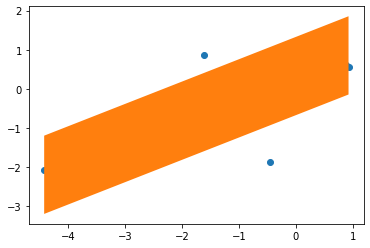

In [39]:
plt.scatter(ddg_exp, ddg_afe)
# mean_afe = np.mean(ddg_afe)
plt.fill_between([min(ddg_exp), max(ddg_exp)], [min(ddg_afe)+1.0, max(ddg_afe)+1.0], [min(ddg_afe)-1.0, max(ddg_afe)-1.0])

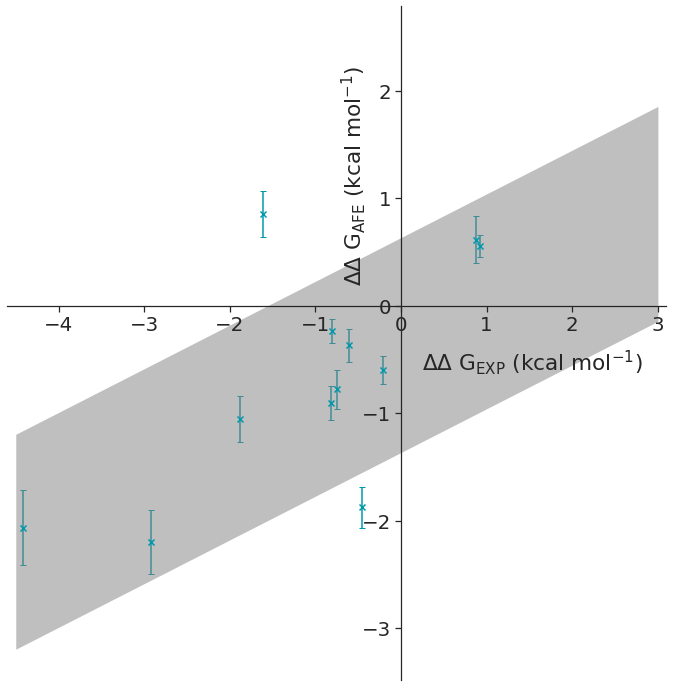

In [53]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=1.8)
ax.scatter(ddg_exp, ddg_afe, marker="x", color="#0099AB")
ax.scatter(3, 2.5, s=0)
(_, caps, _) = ax.errorbar(ddg_exp,
                            ddg_afe,
                            color="#0099AB",
                            yerr=afe_err,
                            capsize=3,
                            linestyle="",
                            zorder=-1)
        
plt.fill_between([-4.5,3], 
                 [min(ddg_afe)+1.0, max(ddg_afe)+1.0], 
                 [min(ddg_afe)-1.0, max(ddg_afe)-1.0],
                 color="grey",
                 alpha=0.5,
                 zorder=-1,
                 linewidth=0,
                 label=r"$\pm$ 1 kcal mol$^{-1}$")
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_linewidth(0.0)
ax.spines["top"].set_linewidth(0.0)
ax.set_xlim(-4.6, 3.1)
ax.text(0.25, -0.6, s=r"$\Delta\Delta$ G$_{\mathrm{EXP}}$ (kcal mol$^{-1}$)")
ax.text(-0.725, 0.25, s=r"$\Delta\Delta$ G$_{\mathrm{AFE}}$ (kcal mol$^{-1}$)", rotation="vertical")
fig.tight_layout()
fig.savefig("../../plots/free_energy/correlation.pdf")



In [27]:
pearson_r = scipy.stats.pearsonr(ddg_exp, ddg_afe)
pearson_r

(0.6674936193034686, 0.017707030166272474)